In [ ]:
!pip install -U fugue[duckdb,sql] pandas_ta 

# Setup

In [1]:
from fugue_notebook import setup
import fugue_duckdb

setup()

<IPython.core.display.Javascript object>

## Other Imports

In [2]:
import os
import pandas as pd

from fugue_sql import fsql

# Load Data

Download the data for this notebook [here](https://drive.google.com/uc?id=1gM9gKrrck0KHlhiKbjuyV13UKfa4SYCg).

## Pandas

In [3]:
import os

save_path = os.getcwd() + '/raw.parquet'

In [4]:
import pandas as pd

df = pd.read_parquet(save_path)
df

,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,symbol,time
0,0.000436,0.000436,0.000436,0.000436,2018.00,1509494459999,0.880400,4,0.00,0.000000,SNGLSETH,2017-11-01 00:00:00
1,0.000436,0.000436,0.000421,0.000425,2497.00,1509494519999,1.074549,8,893.00,0.379605,SNGLSETH,2017-11-01 00:01:00
2,0.000425,0.000428,0.000425,0.000428,2671.00,1509494579999,1.139313,3,2671.00,1.139313,SNGLSETH,2017-11-01 00:02:00
3,0.000428,0.000428,0.000428,0.000428,1773.00,1509494639999,0.758578,4,1773.00,0.758578,SNGLSETH,2017-11-01 00:03:00
4,0.000428,0.000428,0.000428,0.000428,887.00,1509494699999,0.379715,4,887.00,0.379715,SNGLSETH,2017-11-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
46674263,7.689900,7.689900,7.629700,7.647400,3031.78,1514678219999,23197.569353,42,8.23,63.152327,BNBUSDT,2017-12-30 23:56:00
46674264,7.647000,7.647000,7.646700,7.646700,5.99,1514678279999,45.804333,3,5.99,45.804333,BNBUSDT,2017-12-30 23:57:00
46674265,7.645300,7.645300,7.536000,7.624100,3103.35,1514678339999,23504.789627,40,466.72,3567.580772,BNBUSDT,2017-12-30 23:58:00
46674266,7.572100,7.601200,7.536100,7.594700,1573.17,1514678399999,11899.882665,32,1450.23,10971.899718,BNBUSDT,2017-12-30 23:59:00


## DuckDB

In [5]:
%%fsql duck

LOAD '{{save_path}}'
PRINT

,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,symbol,time
0,0.000436,0.000436,0.000436,0.000436,2018.0,1509494459999,0.880400,4,0.0,0.000000,SNGLSETH,2017-11-01 00:00:00
1,0.000436,0.000436,0.000421,0.000425,2497.0,1509494519999,1.074549,8,893.0,0.379605,SNGLSETH,2017-11-01 00:01:00
2,0.000425,0.000428,0.000425,0.000428,2671.0,1509494579999,1.139313,3,2671.0,1.139313,SNGLSETH,2017-11-01 00:02:00
3,0.000428,0.000428,0.000428,0.000428,1773.0,1509494639999,0.758578,4,1773.0,0.758578,SNGLSETH,2017-11-01 00:03:00
4,0.000428,0.000428,0.000428,0.000428,887.0,1509494699999,0.379715,4,887.0,0.379715,SNGLSETH,2017-11-01 00:04:00
5,0.000428,0.000428,0.000428,0.000428,0.0,1509494759999,0.000000,0,0.0,0.000000,SNGLSETH,2017-11-01 00:05:00
6,0.000428,0.000428,0.000428,0.000428,0.0,1509494819999,0.000000,0,0.0,0.000000,SNGLSETH,2017-11-01 00:06:00
7,0.000428,0.000428,0.000428,0.000428,0.0,1509494879999,0.000000,0,0.0,0.000000,SNGLSETH,2017-11-01 00:07:00
8,0.000428,0.000428,0.000428,0.000428,0.0,1509494939999,0.000000,0,0.0,0.000000,SNGLSETH,2017-11-01 00:08:00
9,0.000428,0.000428,0.000428,0.000428,0.0,1509494999999,0.000000,0,0.0,0.000000,SNGLSETH,2017-11-01 00:09:00


# Processing

## Pandas

In [10]:
# Read data
df = pd.read_parquet(save_path)

# Filter
usdt = df[df.symbol.str.endswith("USDT")]

# Get date
processed = usdt.assign(date=usdt.time.dt.date)

# Get total trades by symbol and date
processed = (
    processed.groupby(by=["symbol", "date"])
    .sum()[["Number_of_trades"]].reset_index()
)

# Get symbols with largest average trades
top_symbols_pd = (
    processed.groupby(by=["symbol"])
    .agg(trades=("Number_of_trades", "mean"))
    .nlargest(columns="trades", n=3)
)

<IPython.core.display.Javascript object>

In [64]:
top_symbols_pd

,trades
symbol,
BTCUSDT,204608.145695
ETHUSDT,121244.543046
LTCUSDT,50804.761468


## DuckDB

In [6]:
%%fsql duck

-- Load data
LOAD "{{save_path}}" 

-- Filter 
SELECT * WHERE symbol LIKE '%USDT' 

-- Get total trades by symbol and date  
SELECT 
    symbol, 
    date_trunc('day',time) AS date, 
    SUM(Number_of_trades) AS trades 
GROUP BY 1,2 
    
-- Get symbols with largest average trades     
SELECT 
    symbol, 
    AVG(trades) AS trades 
GROUP BY 1 
ORDER BY 2 DESC 
LIMIT 3
    
-- Save and print output
YIELD DATAFRAME AS top_symbols
PRINT

,symbol,trades
0,BTCUSDT,204608.145695
1,ETHUSDT,121244.543046
2,LTCUSDT,50804.761468


# Extension

## Using a YIELDED DataFrame

In [7]:
top_symbols.as_pandas()

,symbol,trades
0,BTCUSDT,204608.145695
1,ETHUSDT,121244.543046
2,LTCUSDT,50804.761468


In [8]:
%%fsql duck

SELECT * 
FROM top_symbols
PRINT

,symbol,trades
0,BTCUSDT,204608.145695
1,ETHUSDT,121244.543046
2,LTCUSDT,50804.761468


In [9]:
%%fsql duck
src = LOAD "{{save_path}}"

SELECT src.* 
FROM src 
INNER JOIN top_symbols 
ON src.symbol = top_symbols.symbol
YIELD DATAFRAME AS top_data

## Using a Python extension - OUTPUT

In [15]:
def plot_by(df:pd.DataFrame, by, y) -> None:
    for name, group in df.groupby(by):
        group.plot(x="time", y=y, title=name)

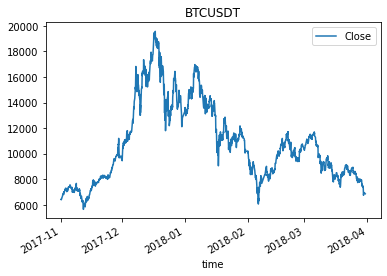

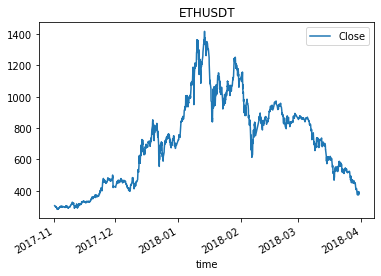

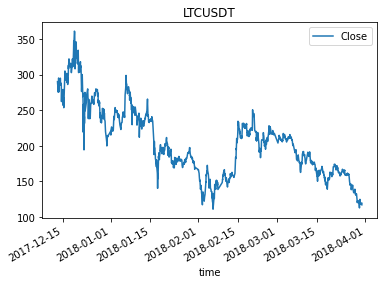

In [16]:
%%fsql duck
SELECT * FROM top_data
SAMPLE 1 PERCENT SEED 0
SELECT * ORDER BY time
OUTPUT USING plot_by(by="symbol", y="Close")

## Using a Python extension - TRANSFORM

In [17]:
# schema: *,macd:double
def macd(df:pd.DataFrame) -> pd.DataFrame:
    import pandas_ta
    macd = df.ta.macd(close='close', fast=12, slow=26, signal=9)
    return df.assign(macd=macd.iloc[:,2])

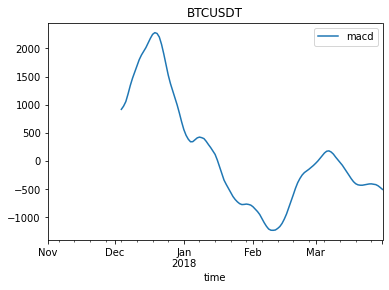

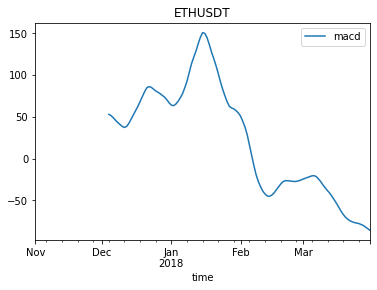

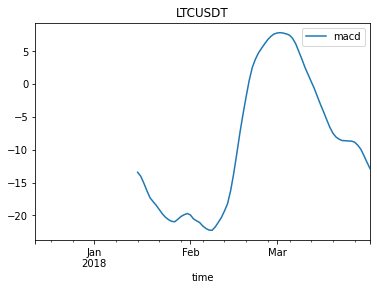

In [20]:
%%fsql duck
SELECT
    symbol,
    date_trunc('day', time) AS time,
    min_by(Open, time) AS open,
    MAX(High) AS high,
    MIN(Low) AS low,
    max_by(Close, time) AS close,
    SUM(Number_of_trades) AS trades,
    SUM(Volume) AS volume
FROM top_data
GROUP BY 1, 2

-- Group by symbol and sort by time 
-- Then use the macd function defined earlier
TRANSFORM PREPARTITION BY symbol PRESORT time
USING macd

-- Plot the macd plots
SELECT * ORDER BY time
OUTPUT USING plot_by(by='symbol', y="macd")

# Fugue + DuckDB in Production

DataFrames()

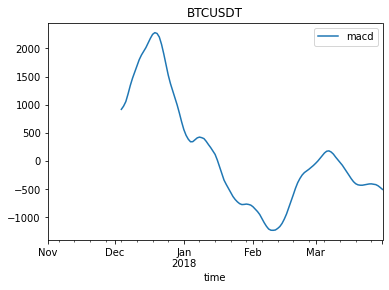

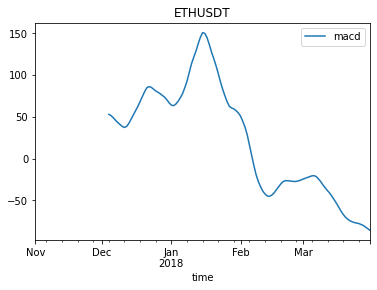

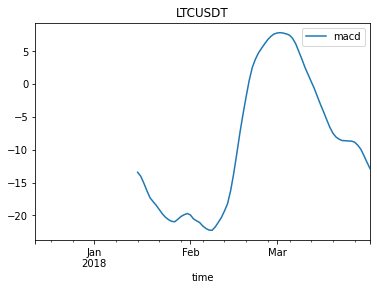

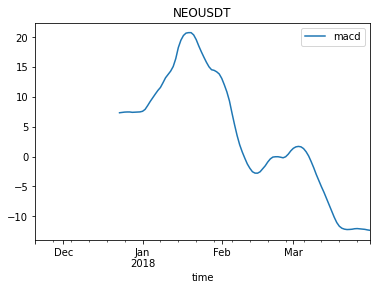

In [23]:
import fugue_duckdb
query = """ src = LOAD "{{save_path}}"
            SELECT * WHERE symbol LIKE '%USDT'
            SELECT symbol, date_trunc('day',time) AS date, SUM(Number_of_trades) AS trades GROUP BY 1,2
            top_symbols = SELECT symbol, AVG(trades) AS trades GROUP BY 1 ORDER BY 2 DESC LIMIT 4
            
            SELECT src.* FROM src INNER JOIN top_symbols ON src.symbol = top_symbols.symbol

            SELECT
                symbol,
                date_trunc('day', time) AS time,
                min_by(Open, time) AS open,
                MAX(High) AS high,
                MIN(Low) AS low,
                max_by(Close, time) AS close,
                SUM(Number_of_trades) AS trades,
                SUM(Volume) AS volume
            GROUP BY 1, 2

            TRANSFORM PREPARTITION BY symbol PRESORT time
            USING macd

            SELECT * ORDER BY time
            OUTPUT USING plot_by(by='symbol', y="macd")
            """
fsql(query).run("duck")